In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
L = 1.0
nx = 51
dx = L / (nx - 1)
alpha = 1.22e-3
q = 0.0

x = np.linspace(0.0, L, num=nx)

T0 = np.zeros_like(x)
T0[0] = 100.0

In [3]:
from scipy import linalg

In [4]:
def lhs_operator(nx, sigma):
    D = np.diag((2 + 1 / sigma) * np.ones(nx - 2))
    D[-1, -1] = 1 + 1 / sigma
    U = np.diag(-1.0 * np.ones(nx - 3), k=1)
    L = np.diag(-1.0 * np.ones(nx - 3), k=-1)
    A = D + U + L
    return A
    

In [5]:
def rhs_vector(T, sigma, q, dx):
    b = T[1:-1] / sigma
    b[0] += T[0]
    b[-1] += q * dx
    return b

In [6]:
def btcs(T0, nt, dt, dx, alpha, q):
    sigma = alpha * dt / dx**2
    A = lhs_operator(nx, sigma)
    T = T0.copy()
    for n in range(nt):
        b = rhs_vector(T, sigma, q, dx)
        T[1:-1] = linalg.solve(A, b)
        T[-1] = T[-2] + q * dx
    return T

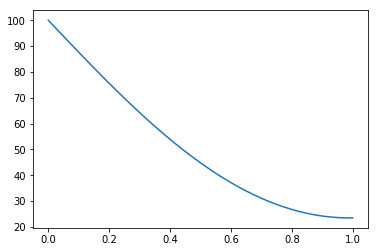

In [7]:
%%timeit
nt = 1000
sigma = 0.5
dt = sigma *dx**2 / alpha
T = btcs(T0, nt, dt, dx, alpha, q)
plt.plot(x, T)